In [1]:
import json
from pathlib import Path

import cv2
import matplotlib.pyplot as pt

In [5]:
imgsdir = Path("/Users/shreyas/Developer/Research/GroundingDINO/data/satellite/images")
# imgsdir = Path("/Users/shreyas/Downloads/cat_dataset/images")

image_id = "high_density_coconut_9.tif"
# image_id = "medium_density_mango_80.tif"
# image_id = "low_density_mango_77.tif"
# image_id = "IMG_20211020_091507.jpg"

# annotations = "/Users/shreyas/Developer/Research/GroundingDINO/dataset/annotations.json"
annotations = "/Users/shreyas/Developer/Research/GroundingDINO/dataset/coco/annotations.json"
# annotations = "/Users/shreyas/Developer/Research/GroundingDINO/data/satellite/annotations/annotations.json"
# annotations = "/Users/shreyas/Downloads/cat_dataset/annotations/annotations_all.json"
annotations = json.load(open(annotations))

annotations.keys()

dict_keys(['images', 'annotations', 'categories'])

In [6]:
def fetch(image_id):
    for image in annotations["images"]:
        if image["file_name"] == image_id:
            break
    else:
        raise NameError(f"Image {image_id} not found")

    ats = []

    for at in annotations["annotations"]:
        if at["image_id"] == image["id"]:
            ats.append(at)

    return image, ats

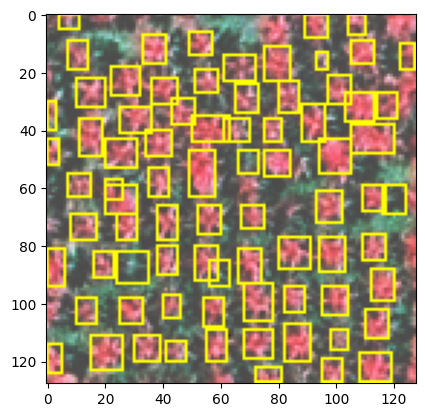

In [7]:
image, boxes = fetch(image_id)
spath = imgsdir / image["file_name"]

simg = cv2.imread(spath)
cv2.cvtColor(simg, cv2.COLOR_BGR2RGB, simg)

for box in boxes:
    box = box["bbox"]

    box = [box[0], box[1], box[0] + box[2], box[1] + box[3]]
    box = [*map(int, box)]

    cv2.rectangle(simg, box[:2], box[2:], (255, 255, 0), 1)

pt.imshow(simg);